# Issue 5: Advanced EDA & Feature Relationships  

##  Description
- Explore relationships between **features and the target variable (Y)**.  
- Use visualizations like **box plots, violin plots, pair plots**.  
- Generate insights on how **different feature combinations influence customer behavior**.

# Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("encoded-in-vehicle-coupon-recommendation.csv")

In [28]:
# Basic Details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12610 non-null  int64
 1   passanger             12610 non-null  int64
 2   weather               12610 non-null  int64
 3   temperature           12610 non-null  int64
 4   time                  12610 non-null  int64
 5   coupon                12610 non-null  int64
 6   expiration            12610 non-null  int64
 7   gender                12610 non-null  int64
 8   age                   12610 non-null  int64
 9   maritalStatus         12610 non-null  int64
 10  has_children          12610 non-null  int64
 11  education             12610 non-null  int64
 12  occupation            12610 non-null  int64
 13  income                12610 non-null  int64
 14  Bar                   12610 non-null  int64
 15  CoffeeHouse           12610 non-null  int64
 16  Carr

In [29]:
data.describe()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,...,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,0.990801,0.674148,1.698573,1.330690,2.230531,2.054084,0.442427,0.486994,2.596114,1.710944,...,3.733703,1.029262,1.565583,2.414988,2.286122,1.268993,0.559794,0.116019,0.215543,0.567565
std,0.709259,0.941886,0.633438,0.766135,1.438425,1.349154,0.496694,0.499851,2.225206,0.833673,...,2.543051,1.096437,1.233673,0.926148,0.916693,0.879962,0.496432,0.320260,0.411215,0.495434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,...,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,4.000000,2.000000,...,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000,7.000000,4.000000,...,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


# Univariate Analysis

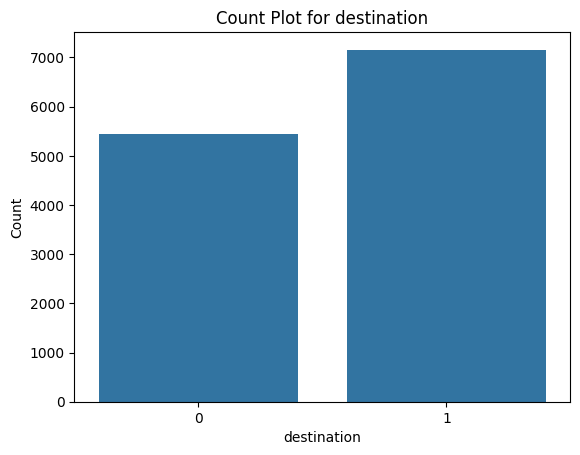

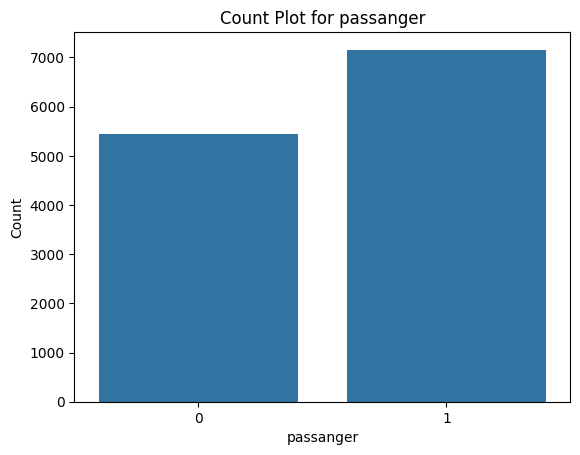

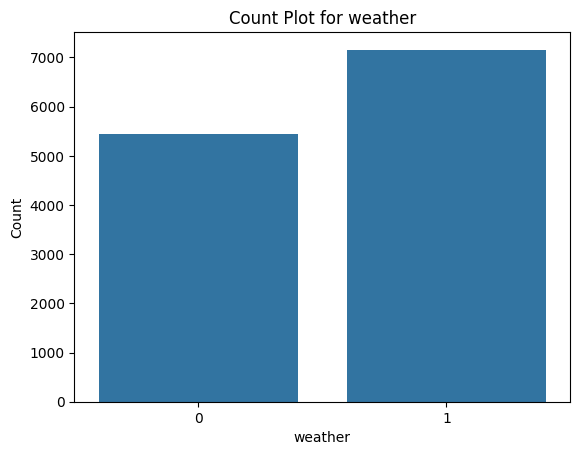

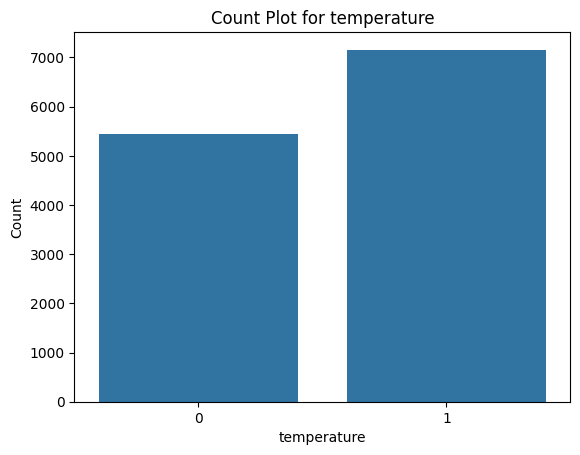

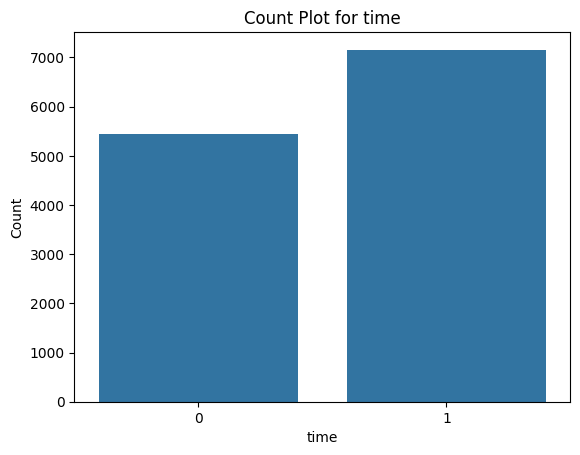

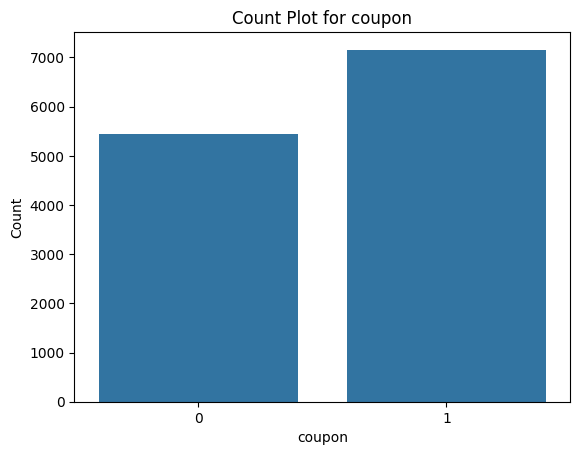

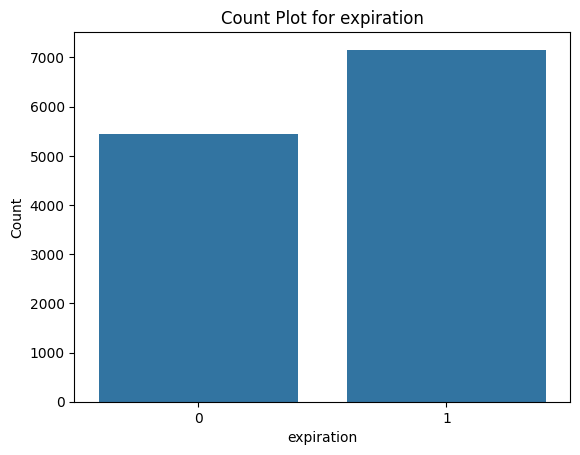

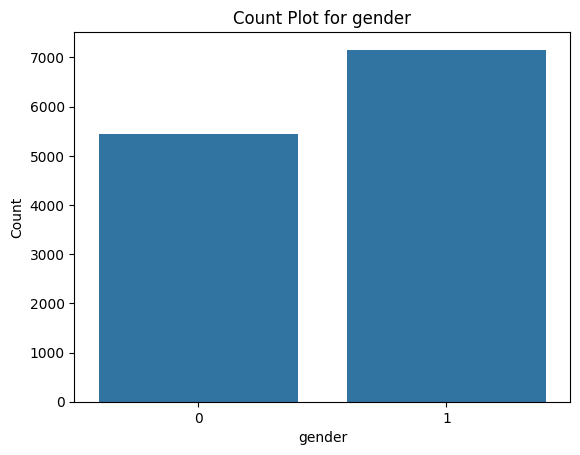

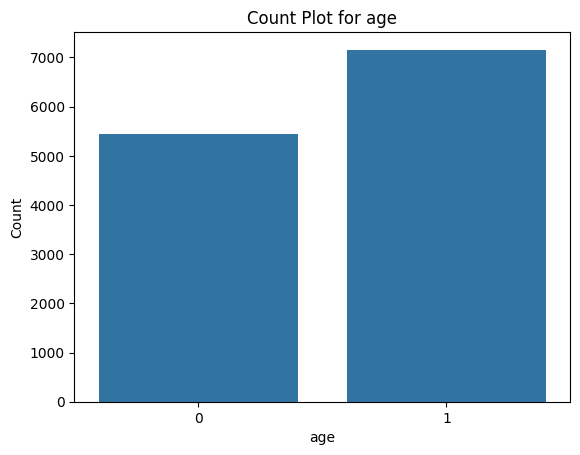

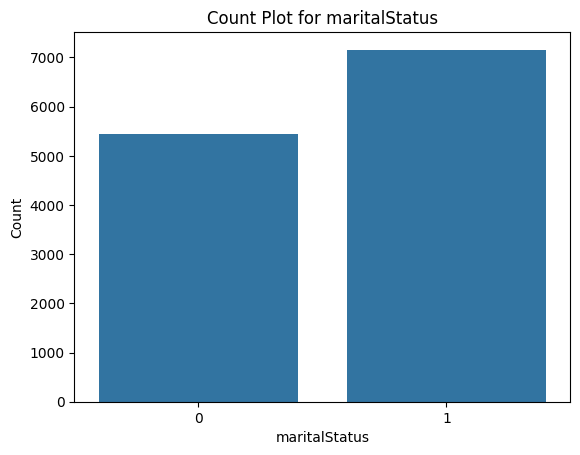

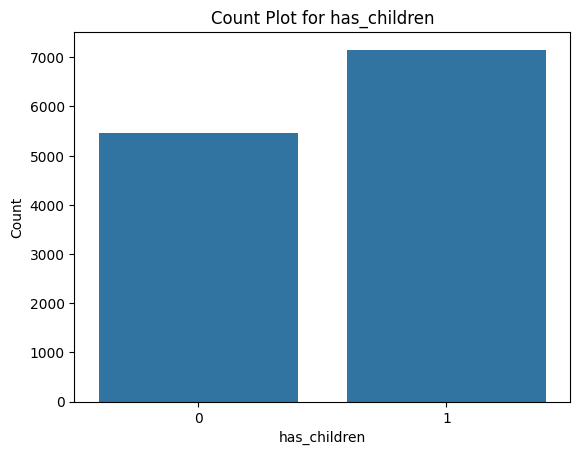

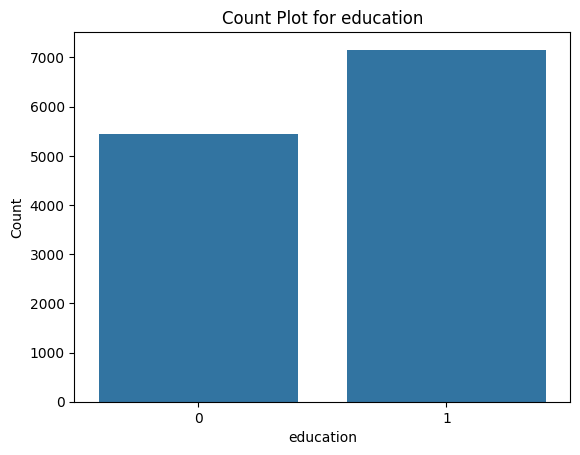

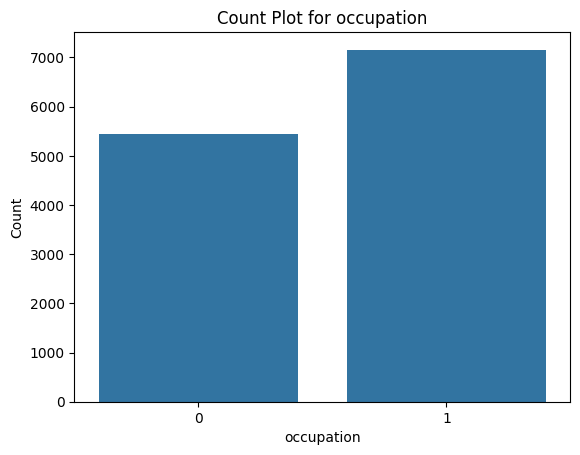

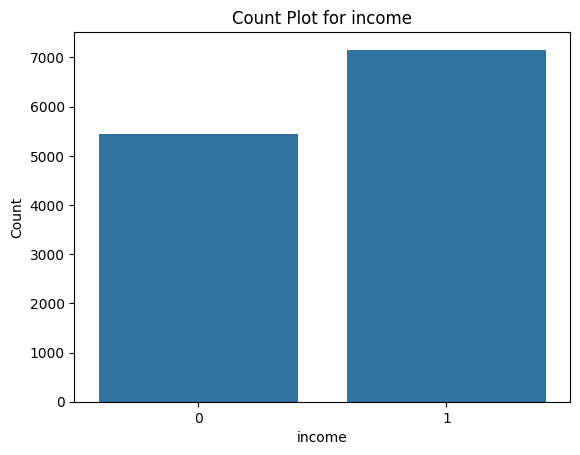

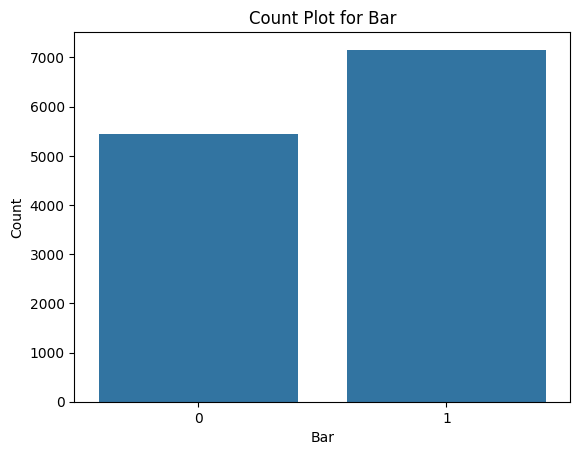

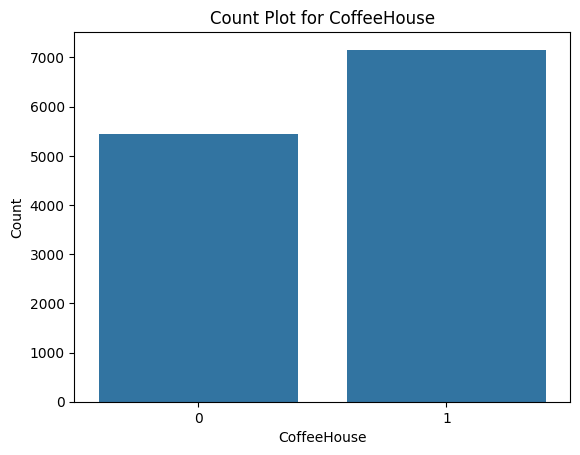

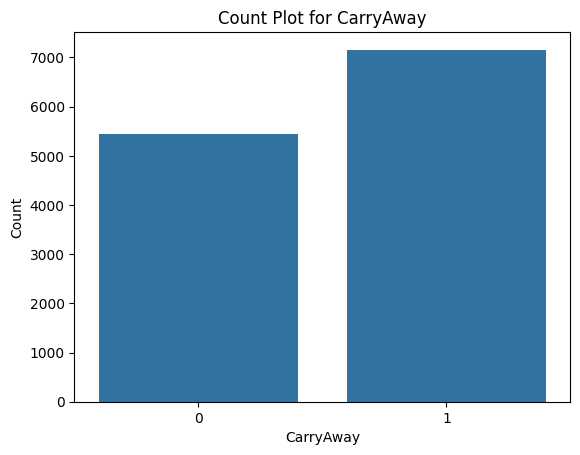

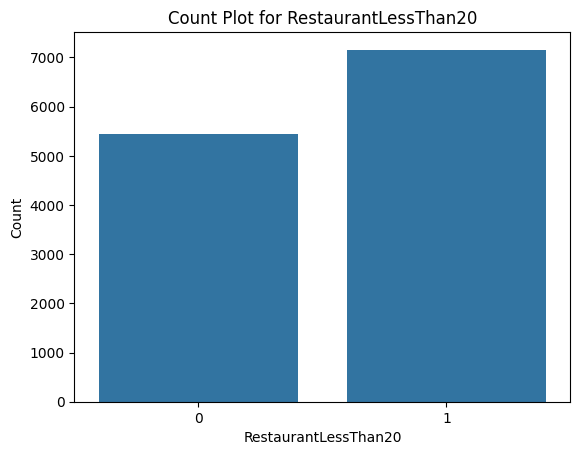

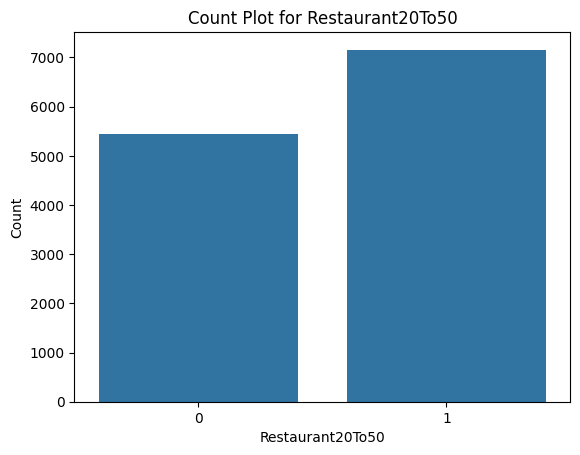

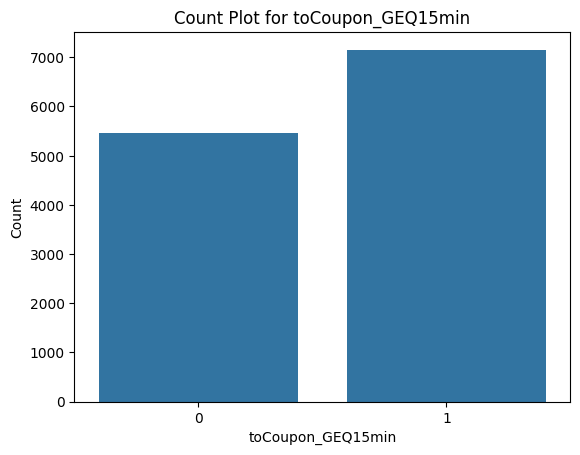

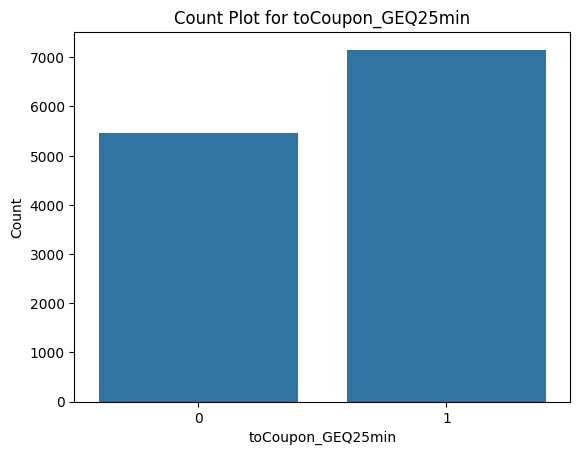

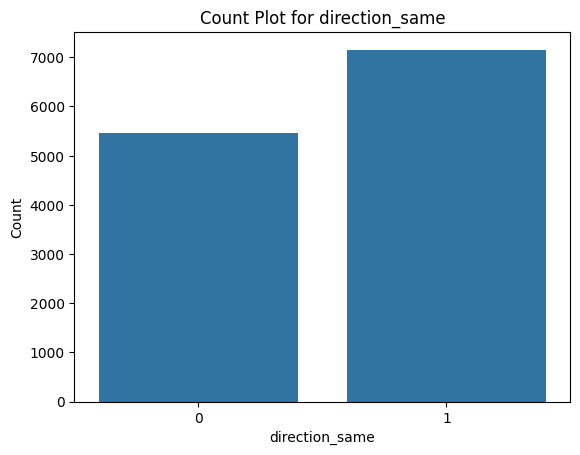

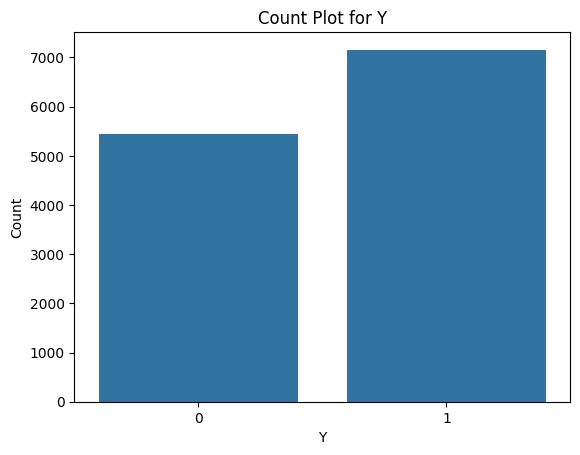

In [30]:
def countplot(df):

  for i in df.columns:
    sns.countplot(x=data["Y"])
    plt.title(f"Count Plot for {i}")
    plt.xlabel(f"{i}")
    plt.ylabel("Count")
    plt.show()

countplot(data)

# Analysis from CountPlot -> The Dataset looks slightly imbalanced and may require Smote for balancing classes

# Bivariate Analysis

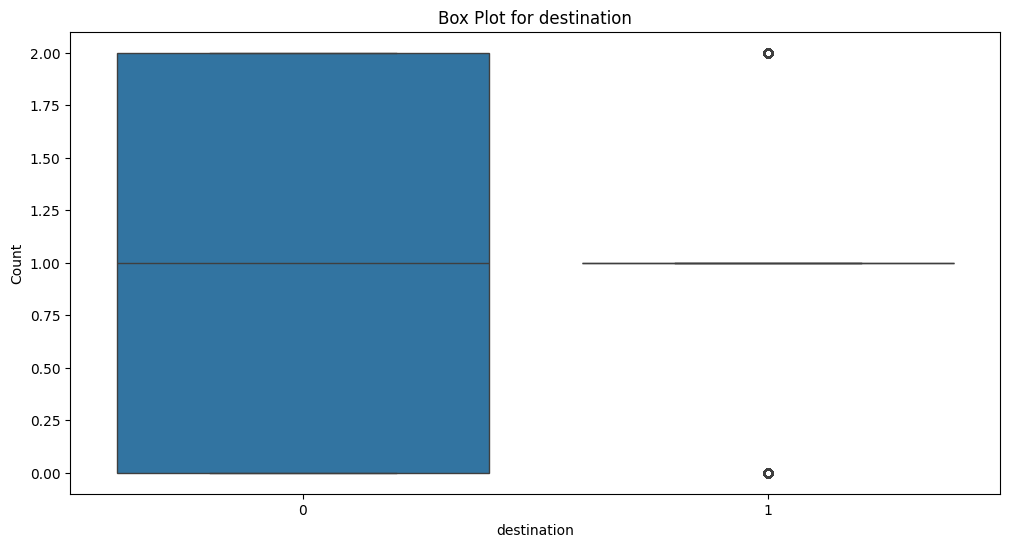

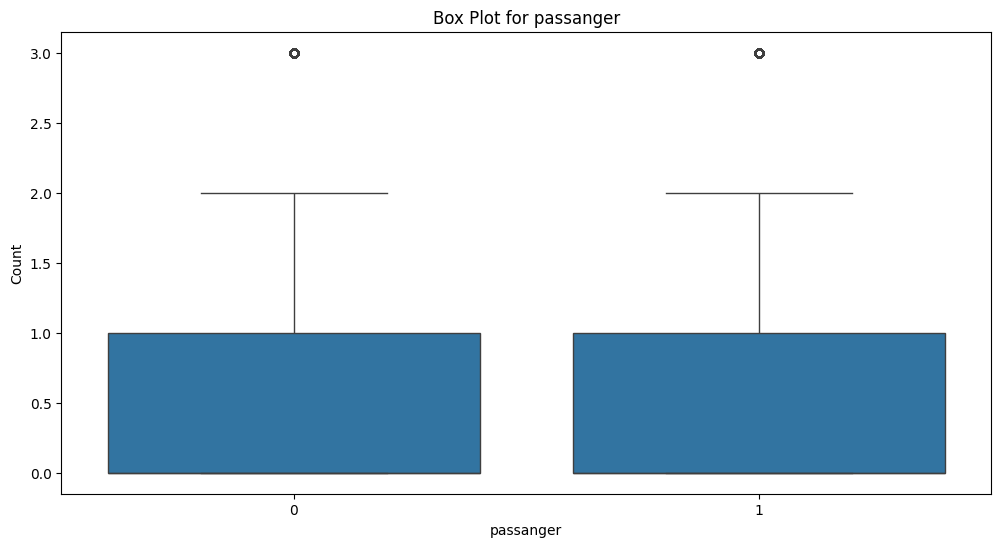

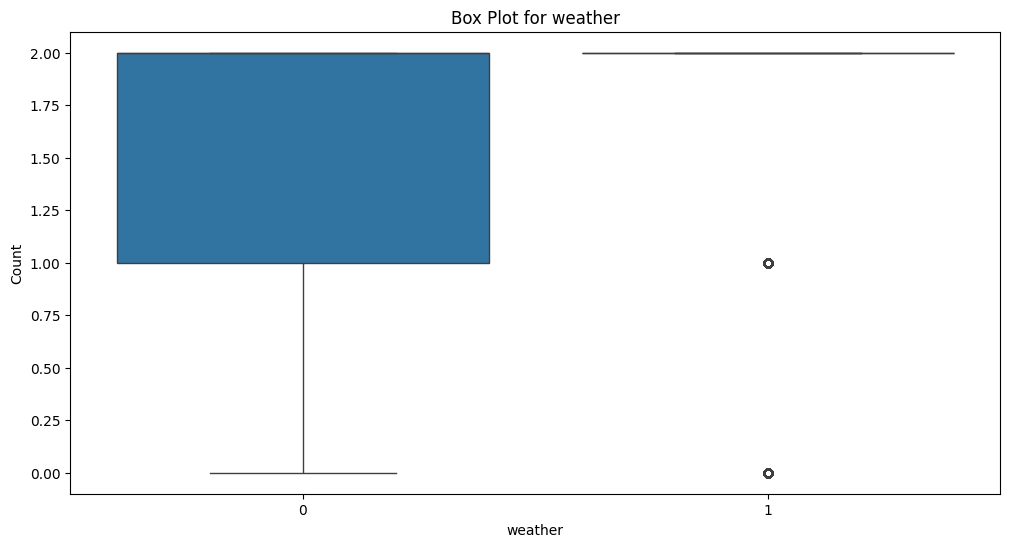

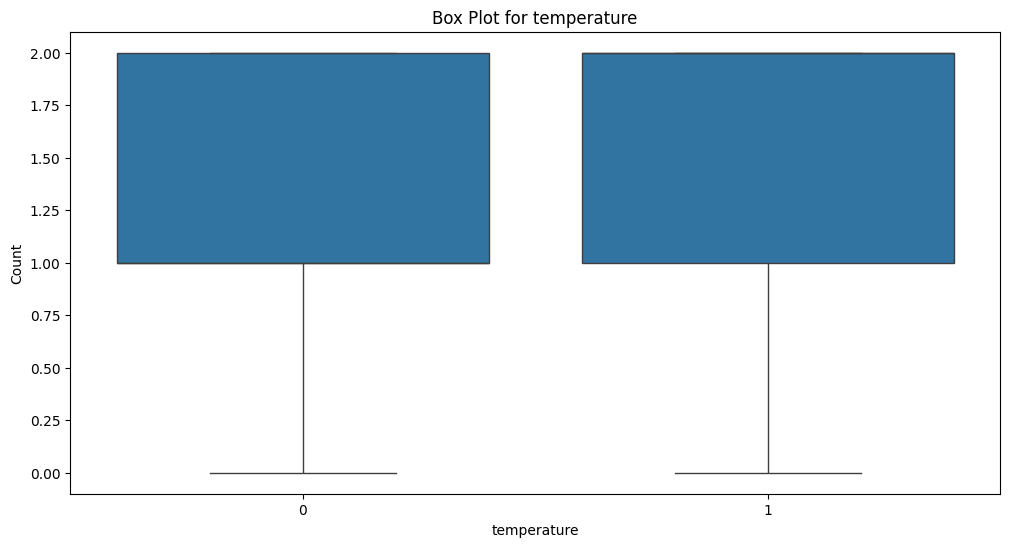

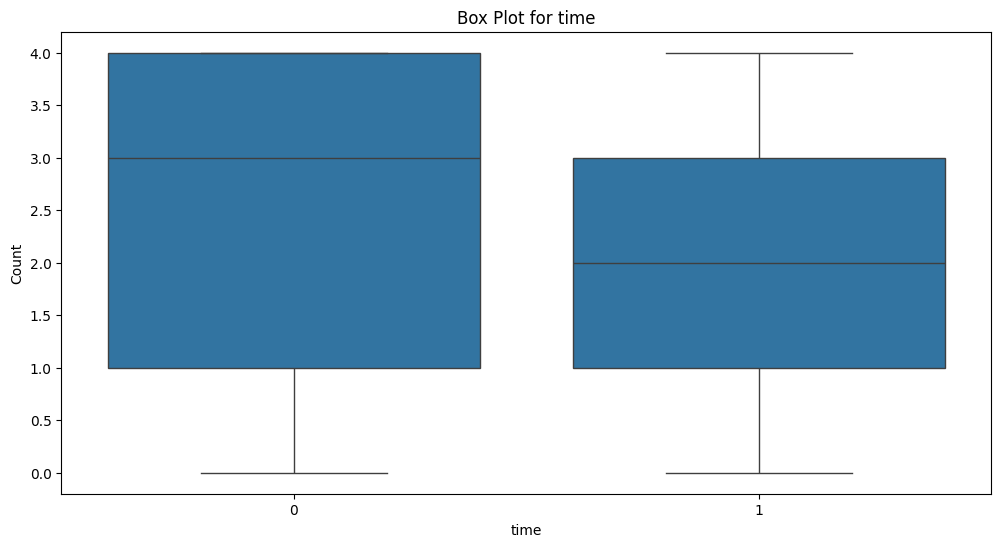

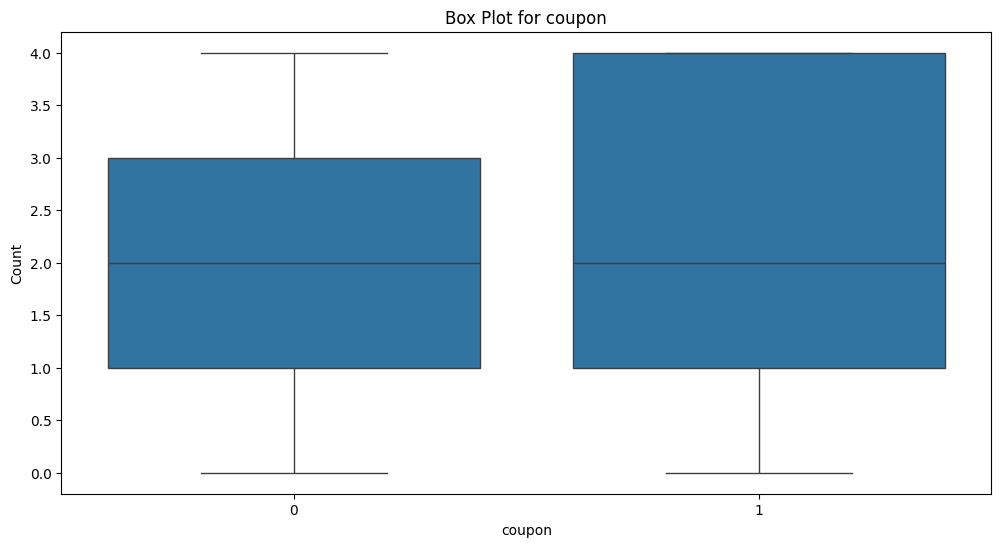

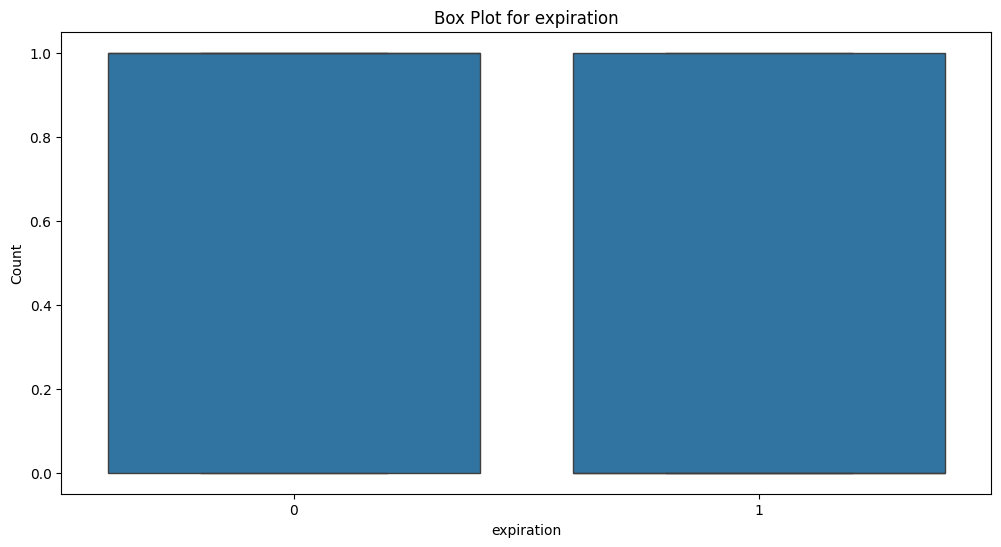

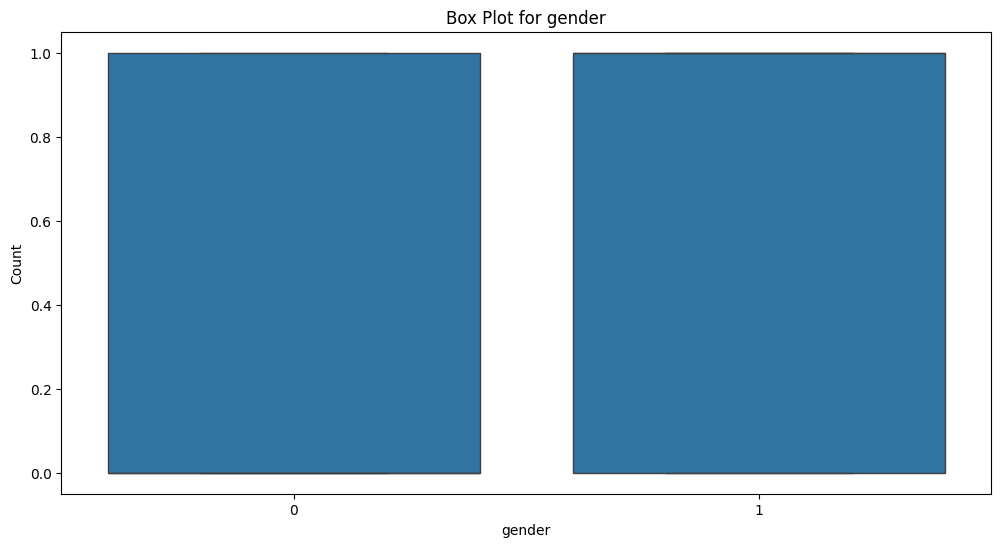

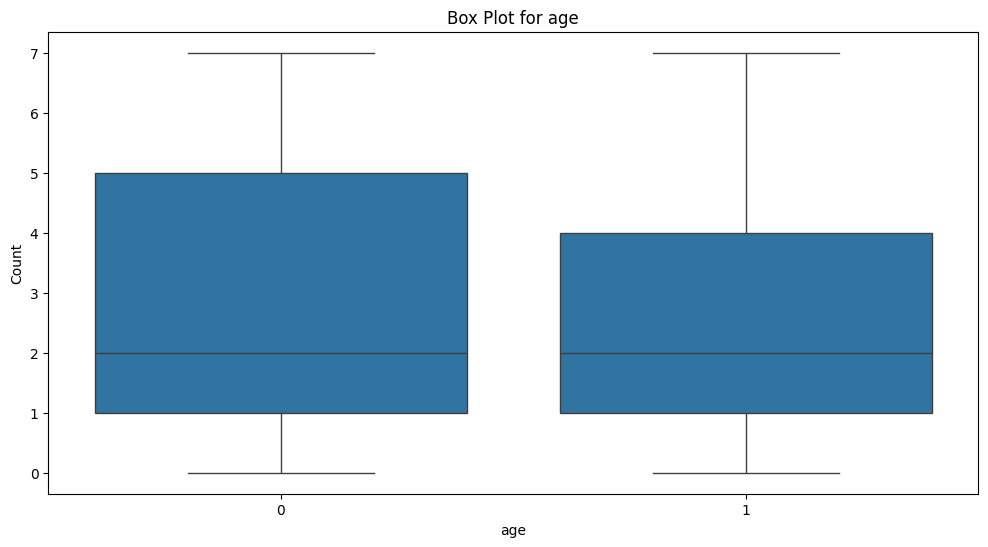

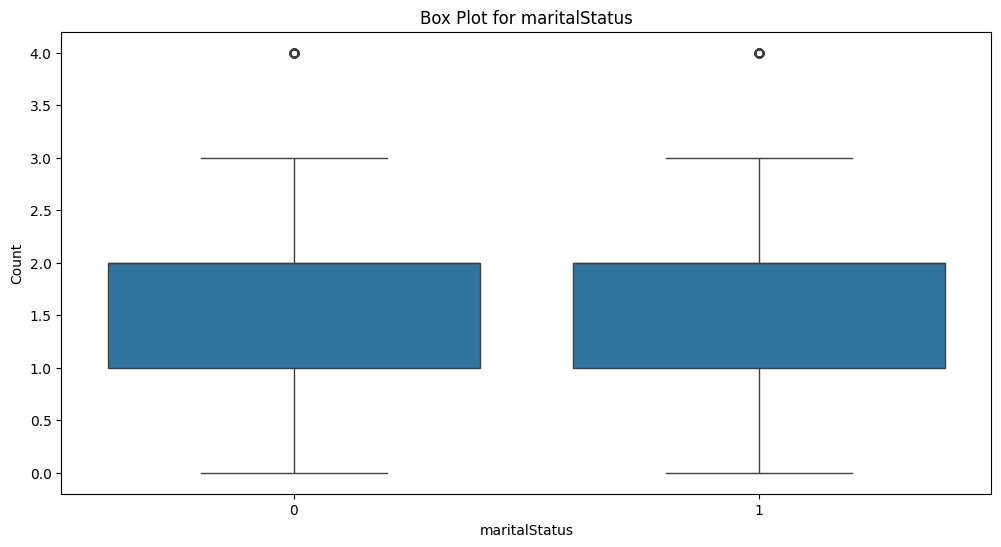

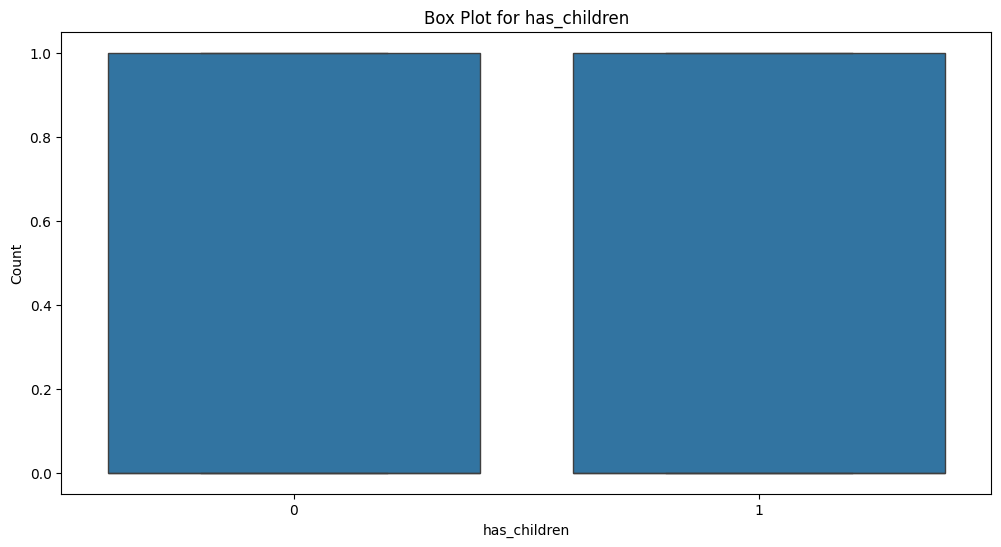

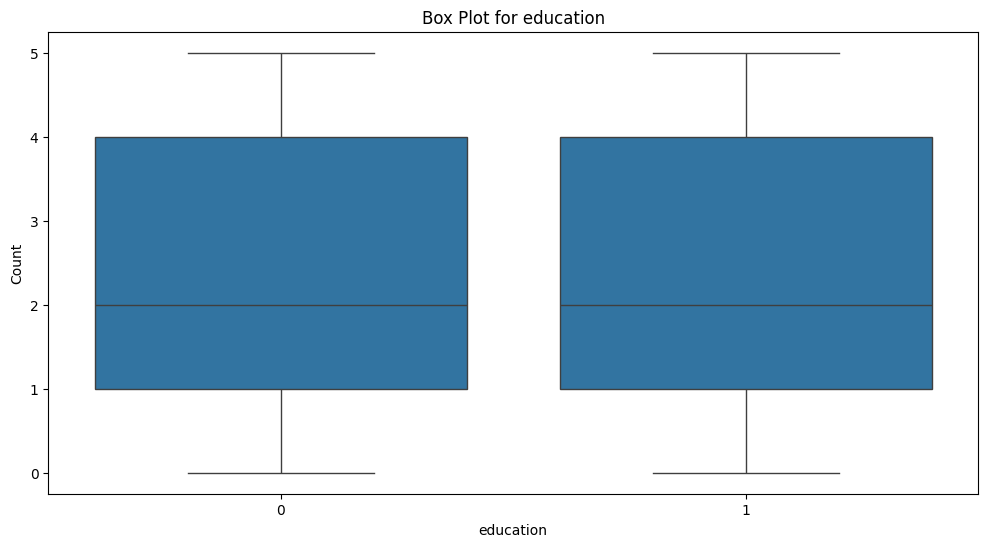

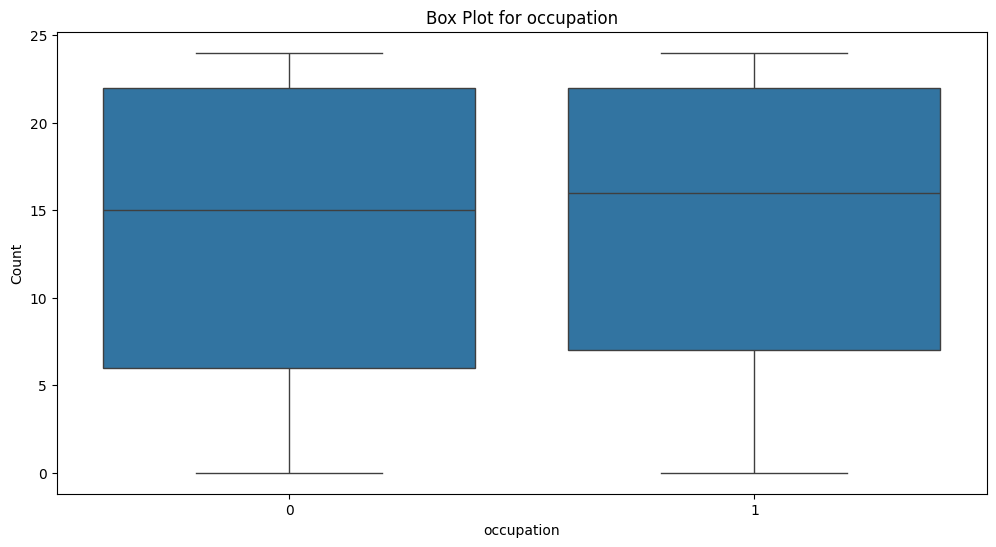

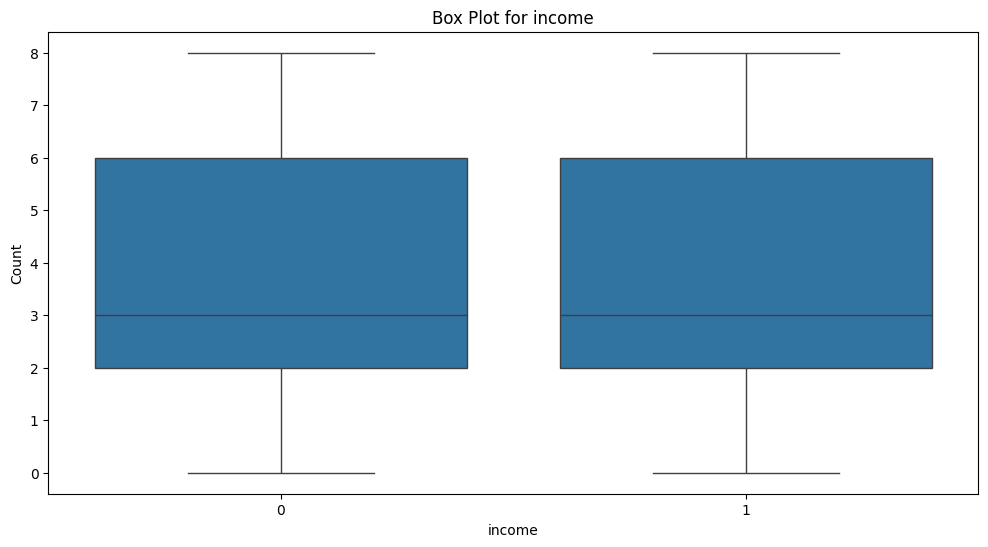

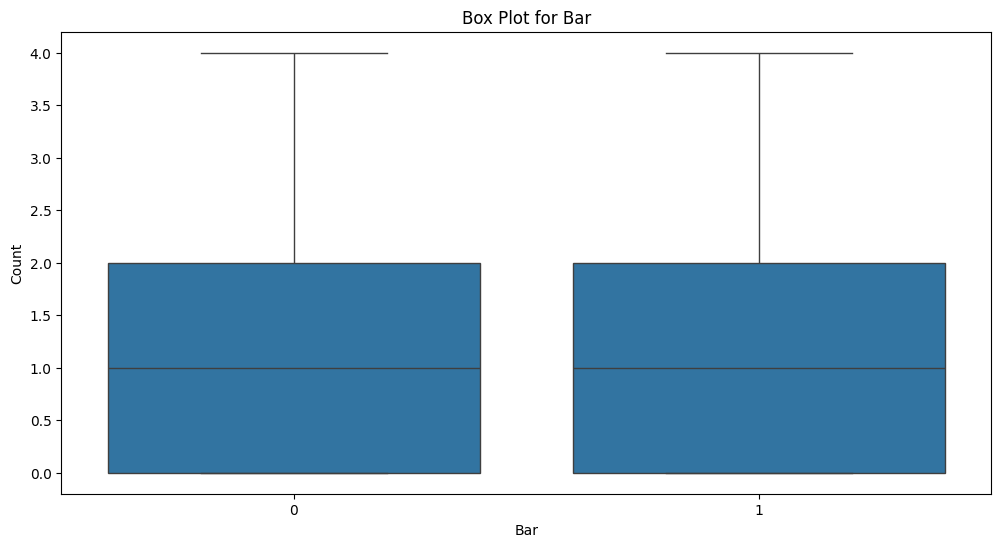

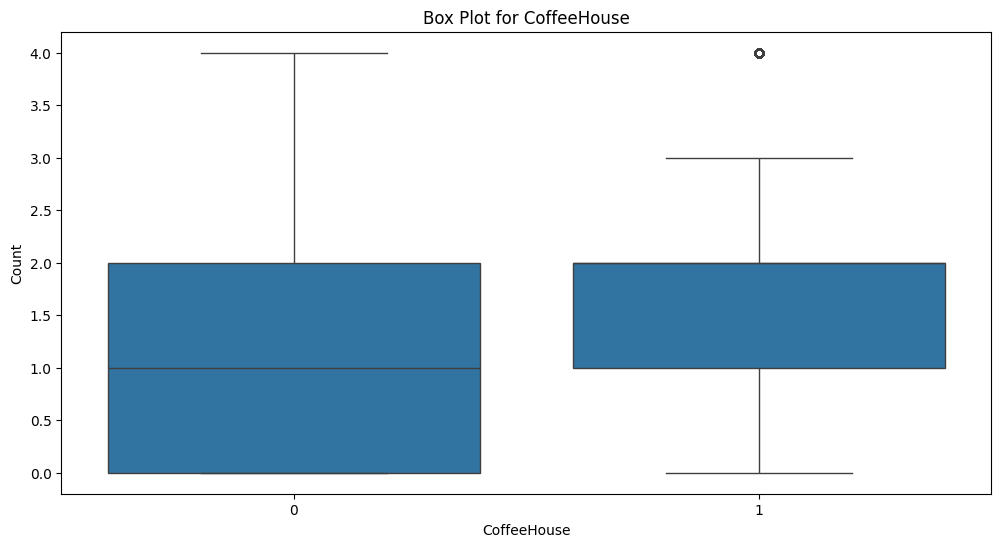

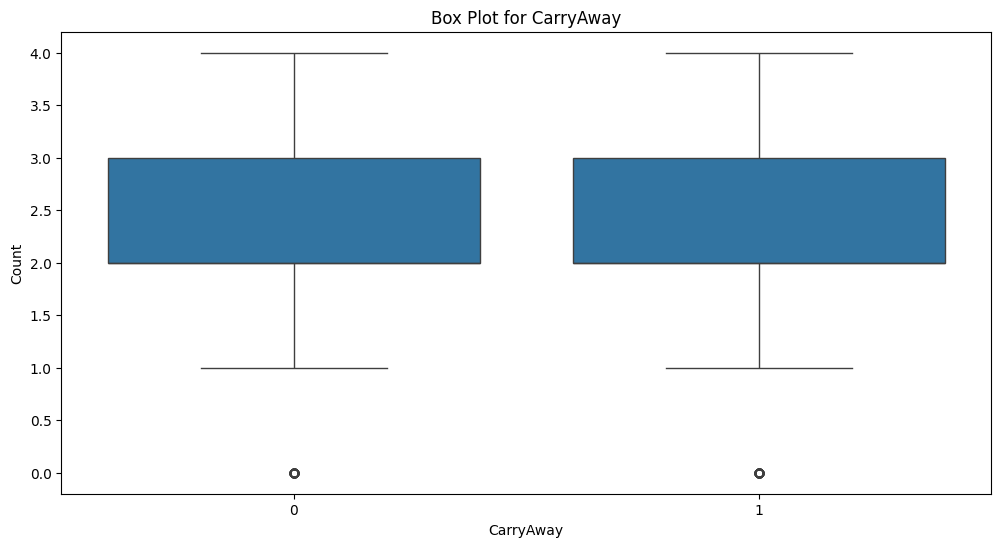

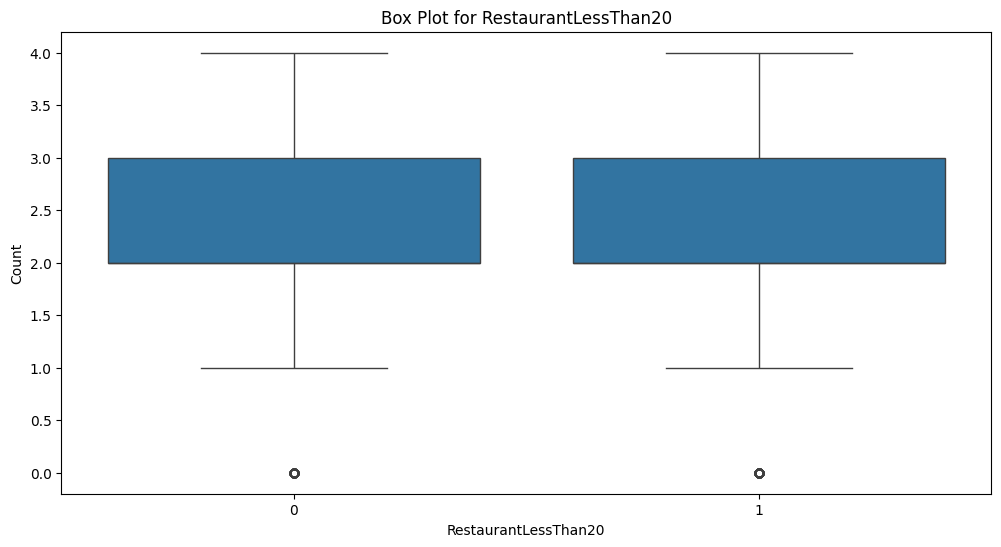

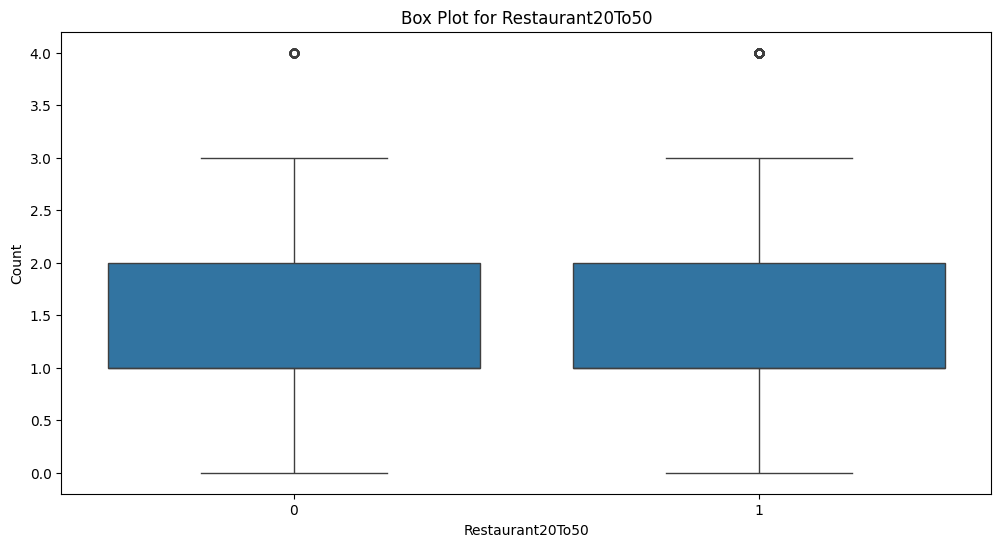

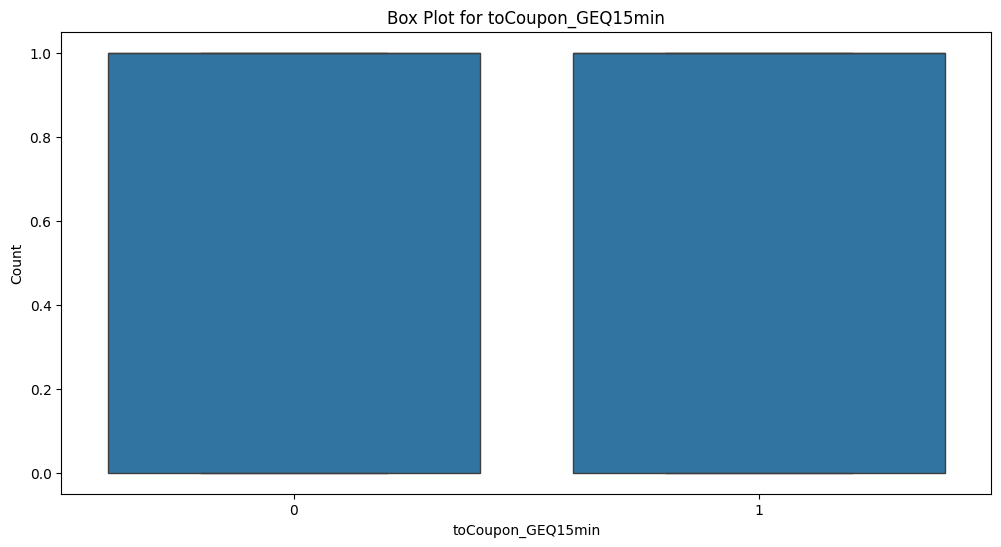

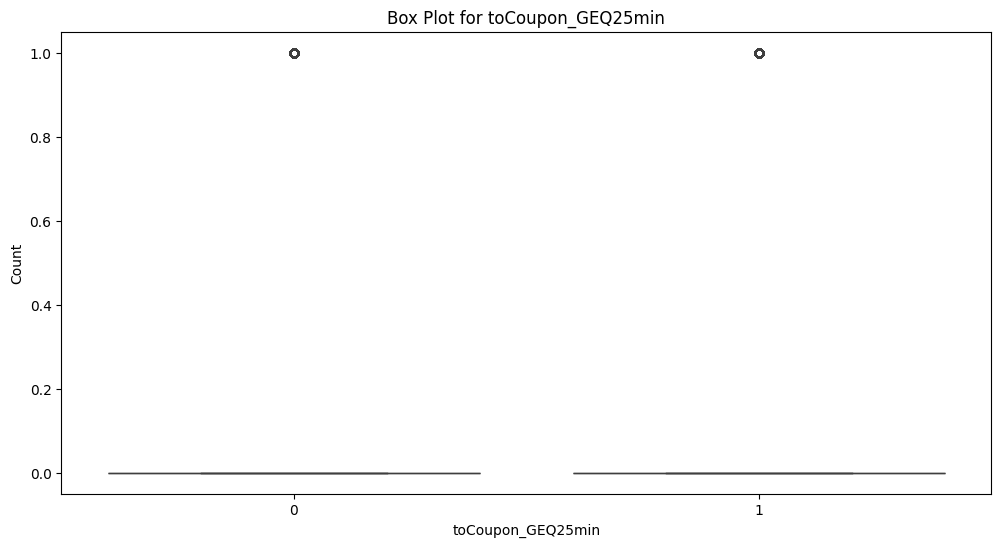

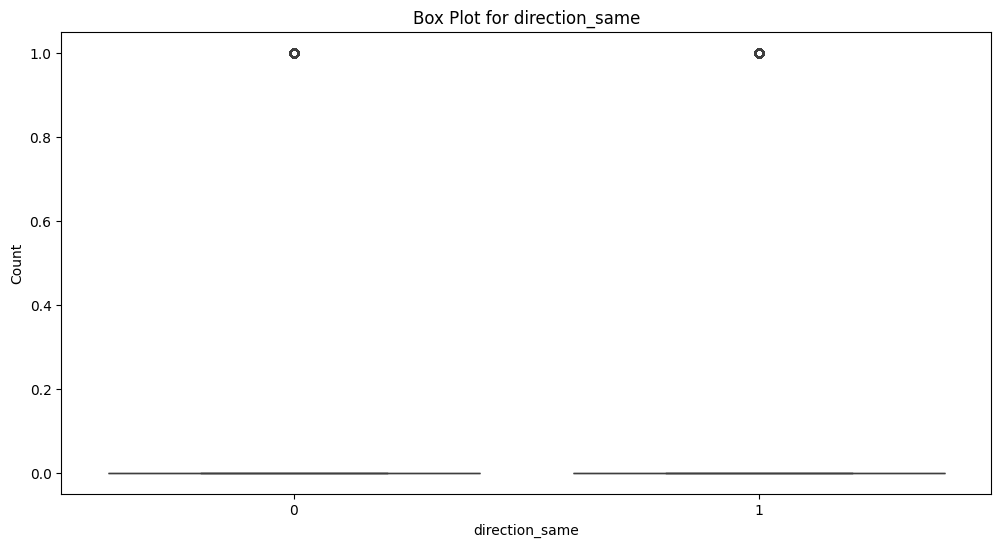

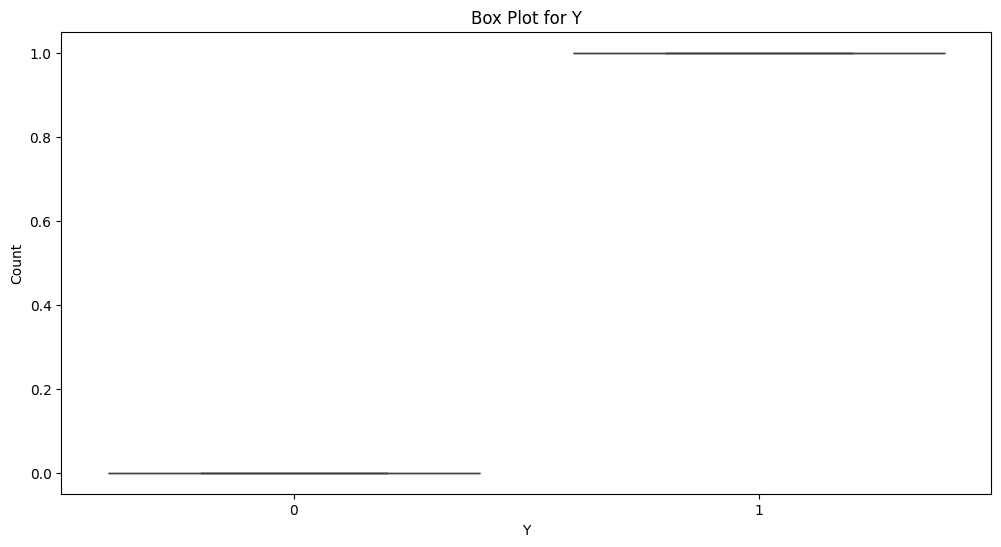

In [31]:
# Boxplot analysis
def boxplot(df):

  for i in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data["Y"], y=data[i])
    plt.title(f"Box Plot for {i}")
    plt.xlabel(f"{i}")
    plt.ylabel("Count")
    plt.show()

boxplot(data)

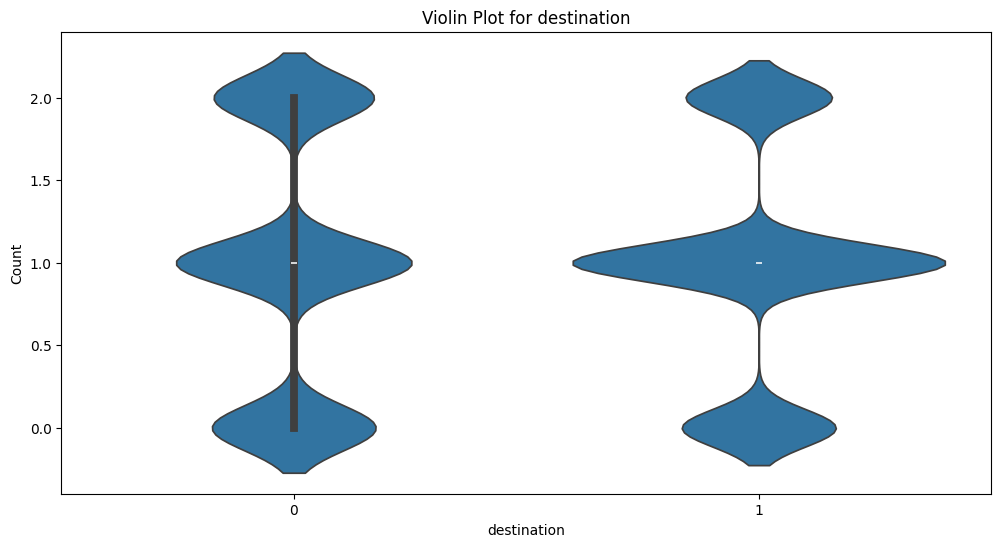

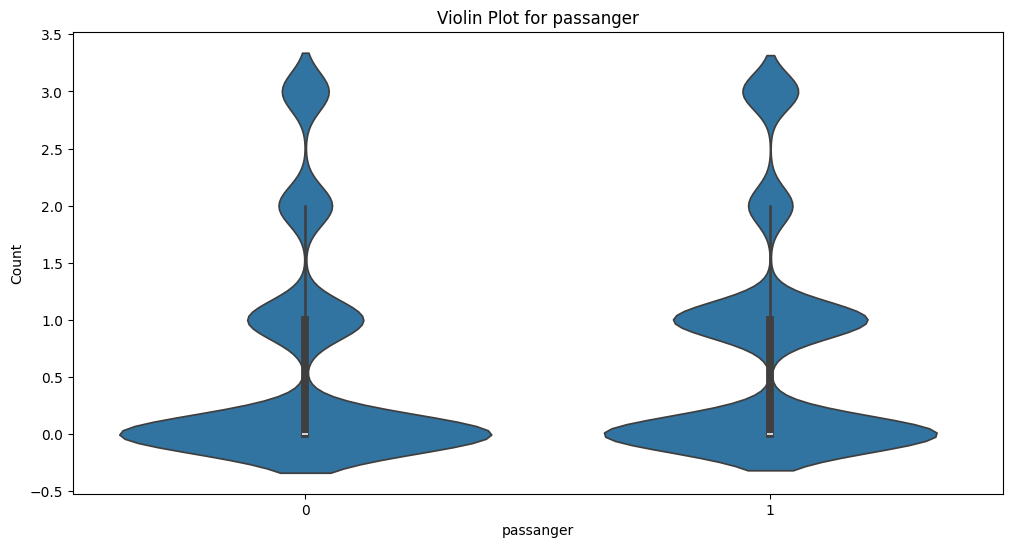

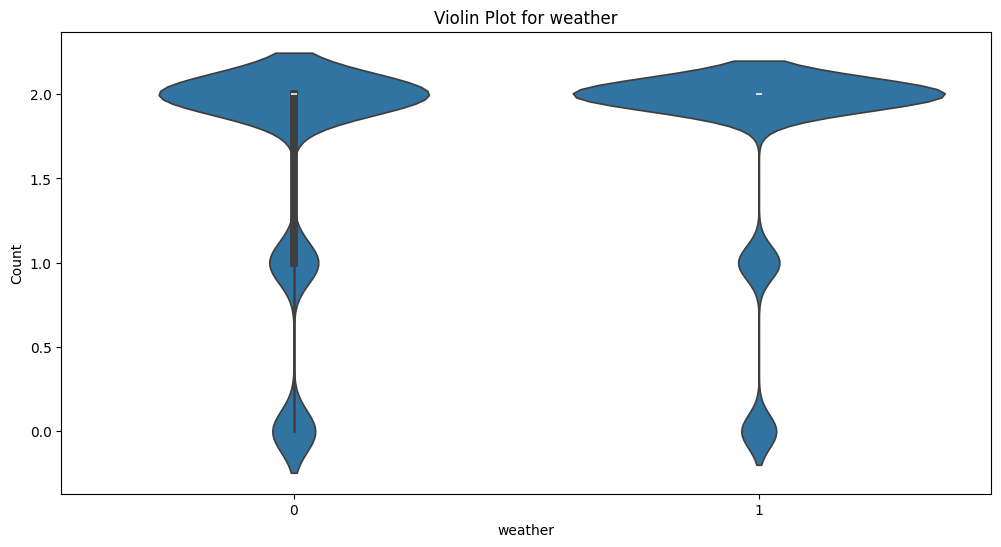

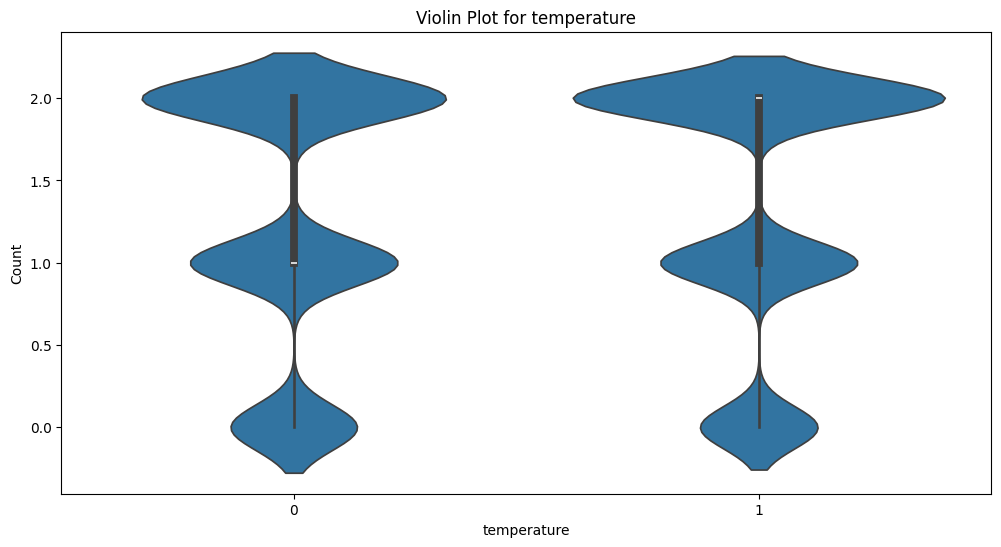

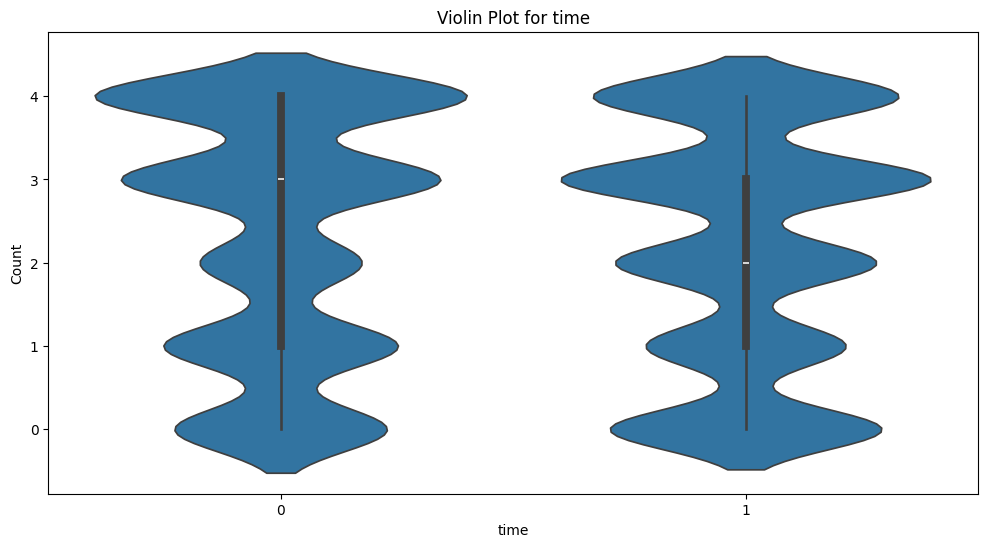

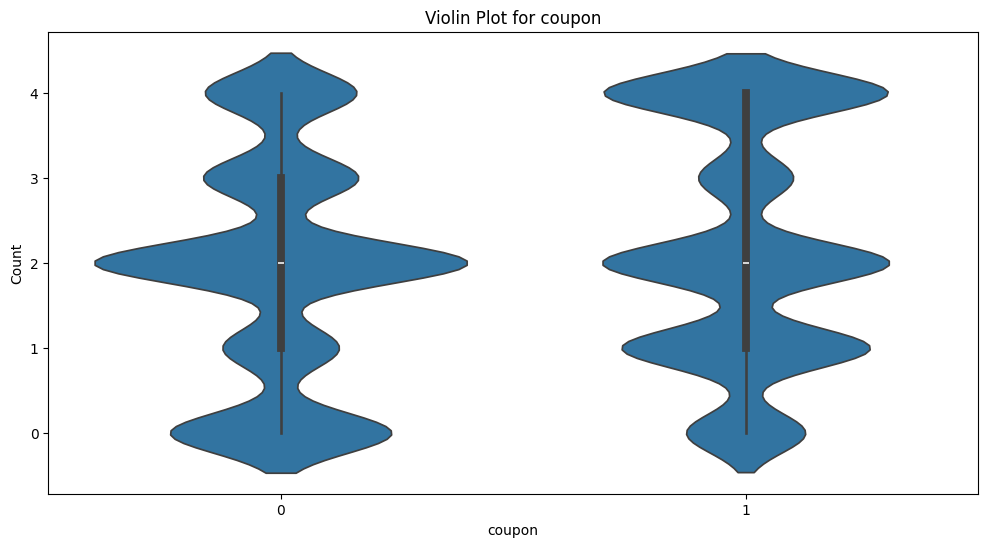

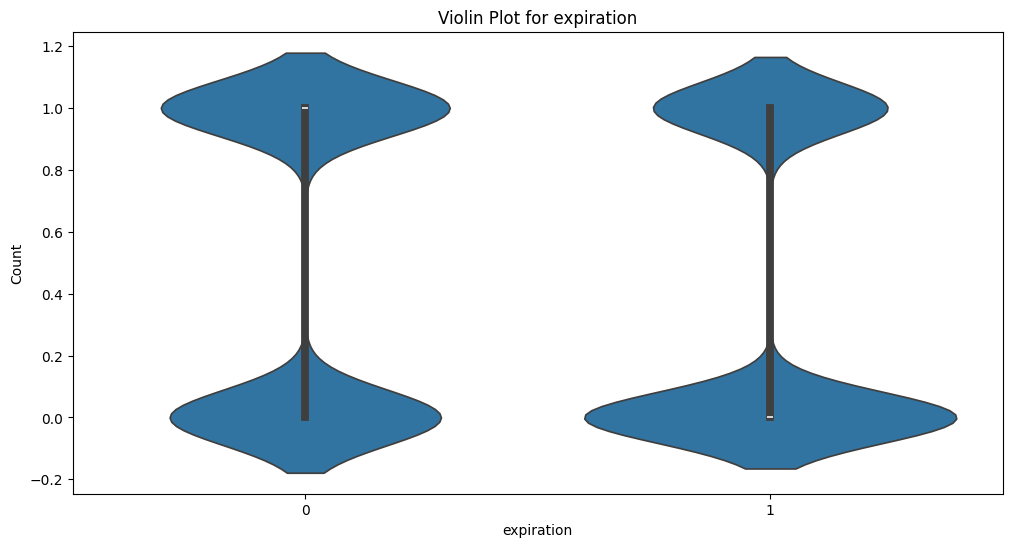

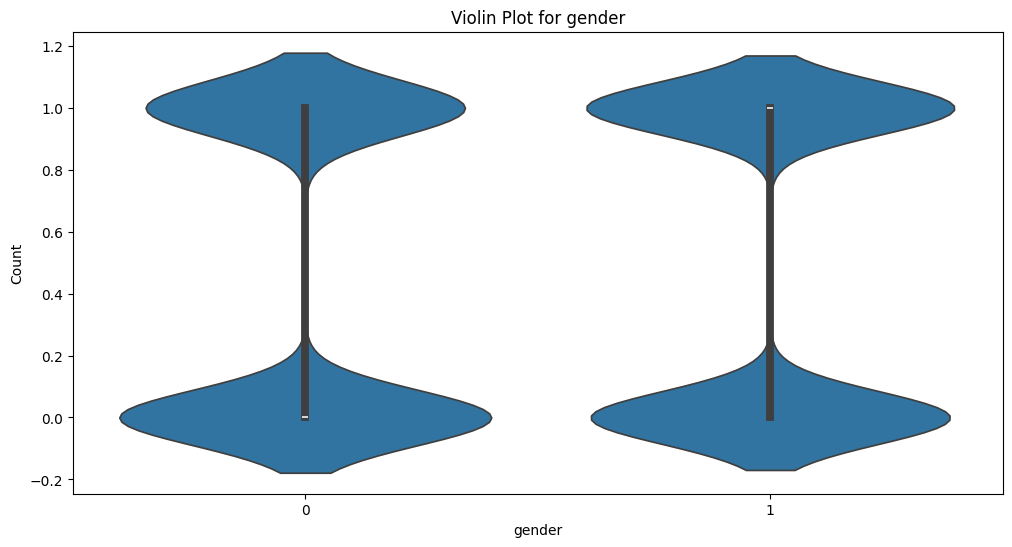

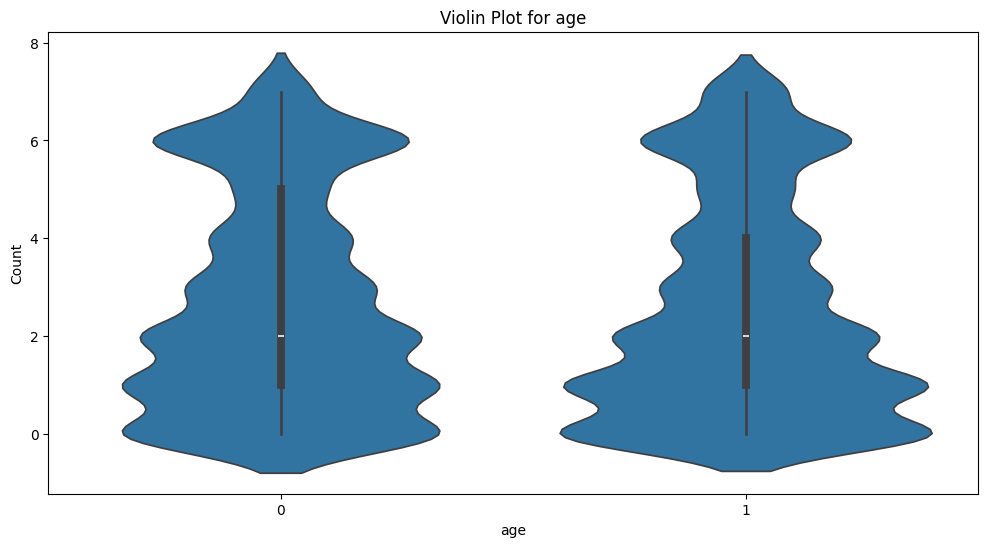

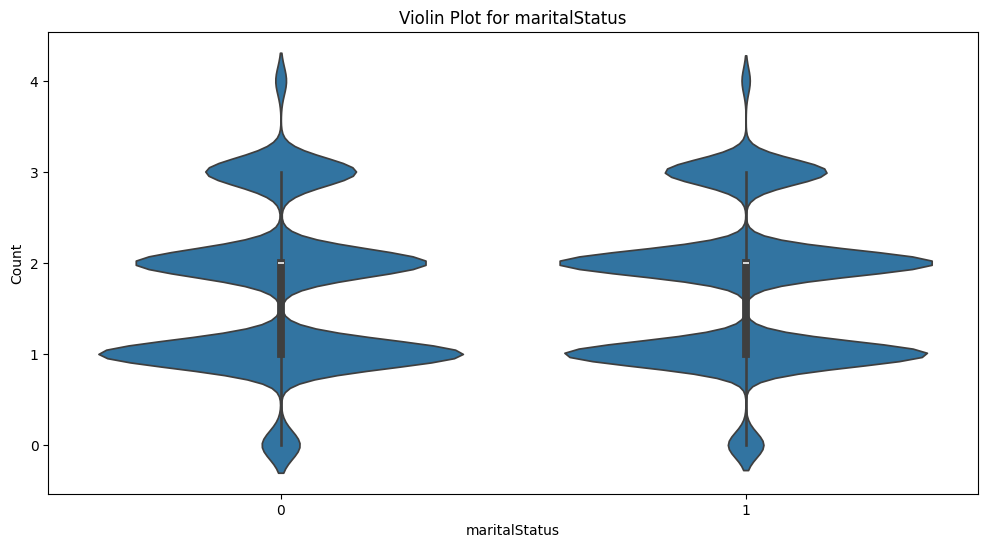

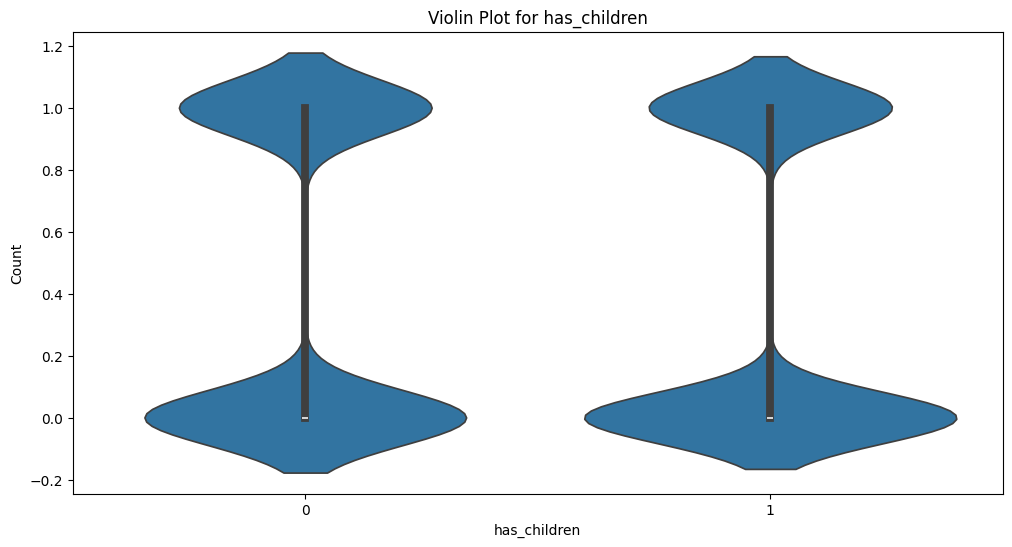

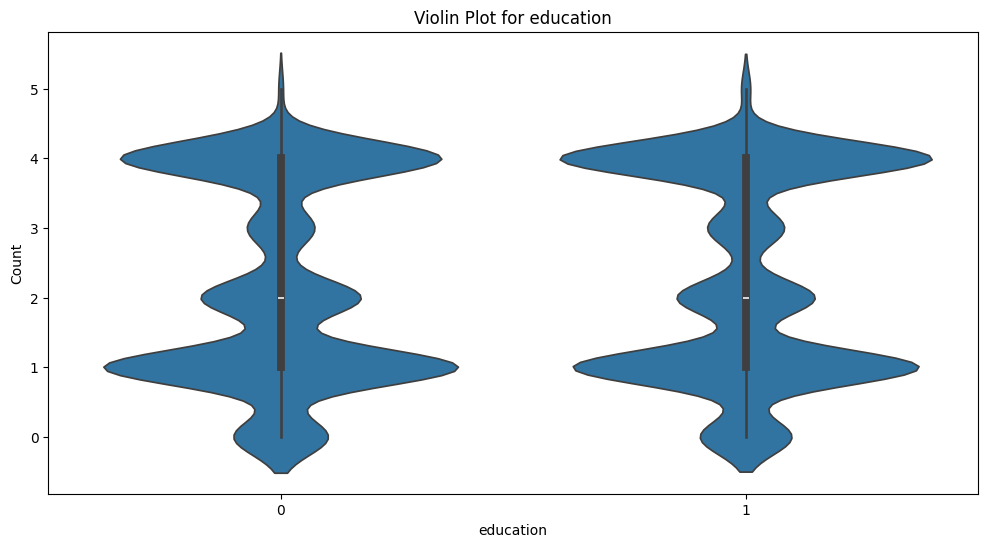

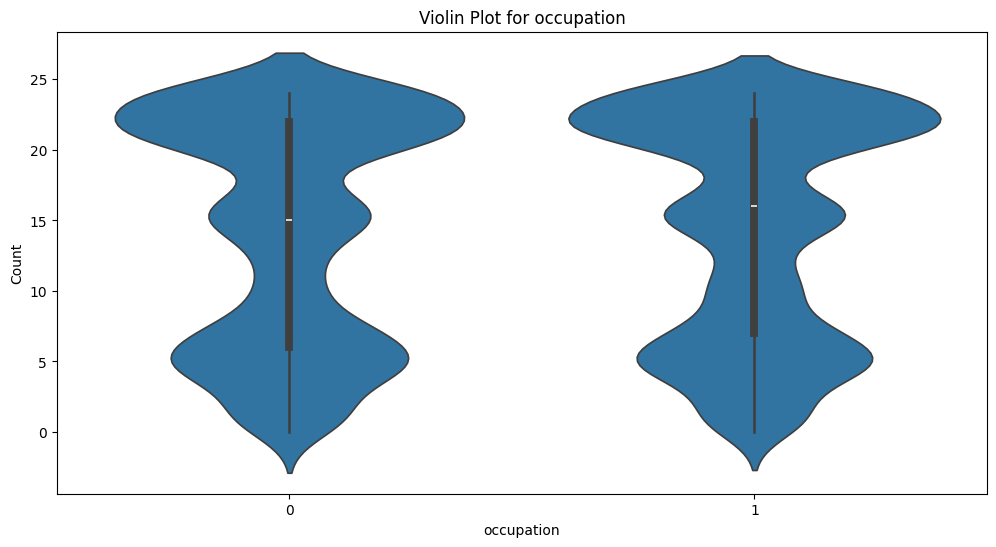

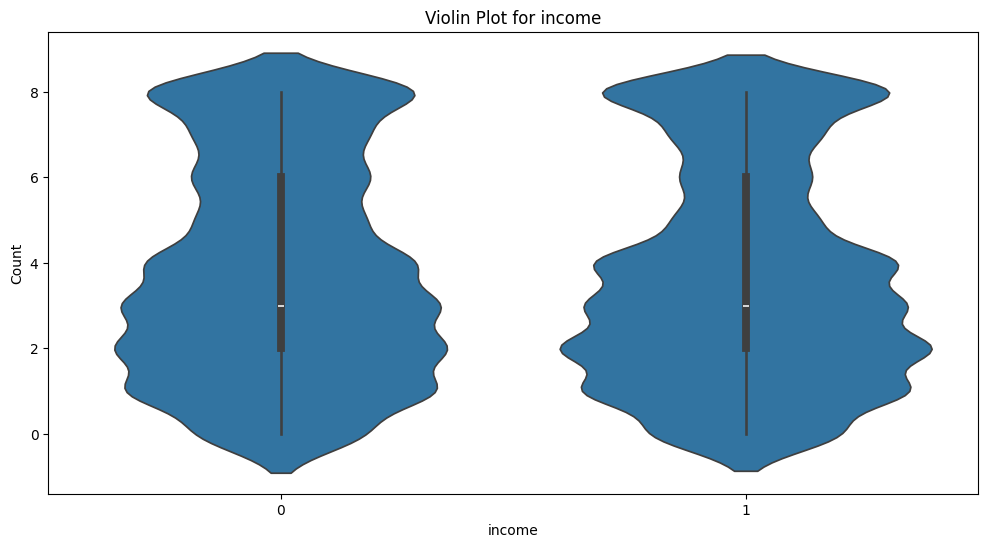

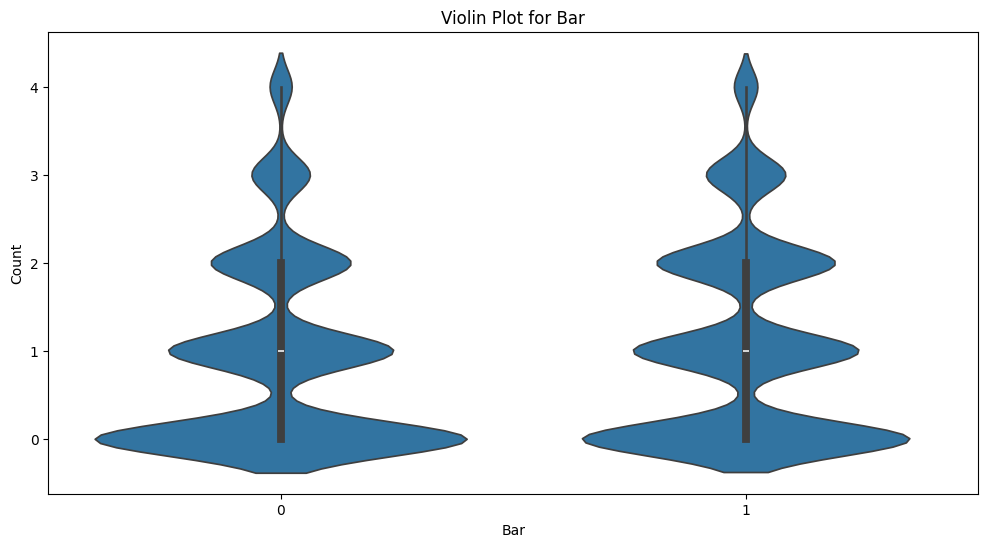

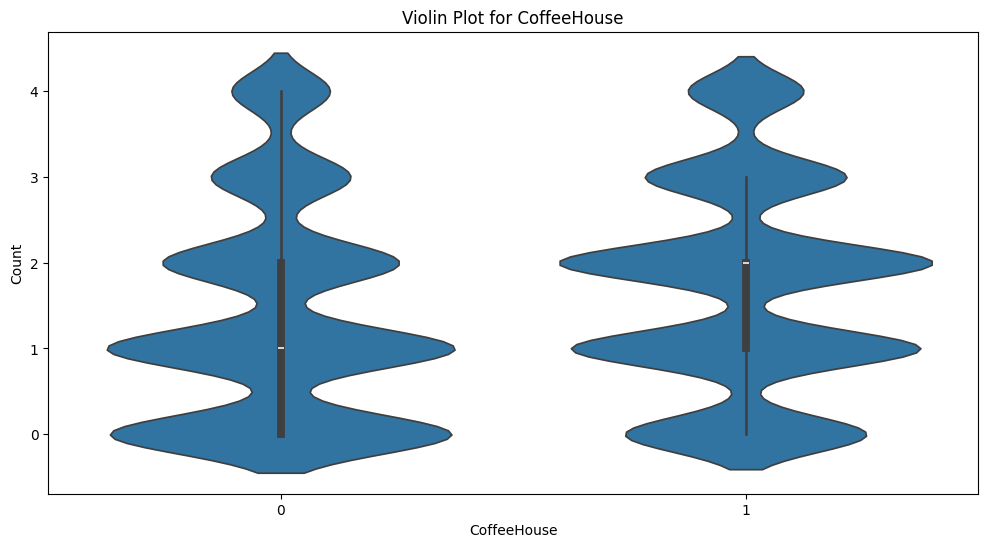

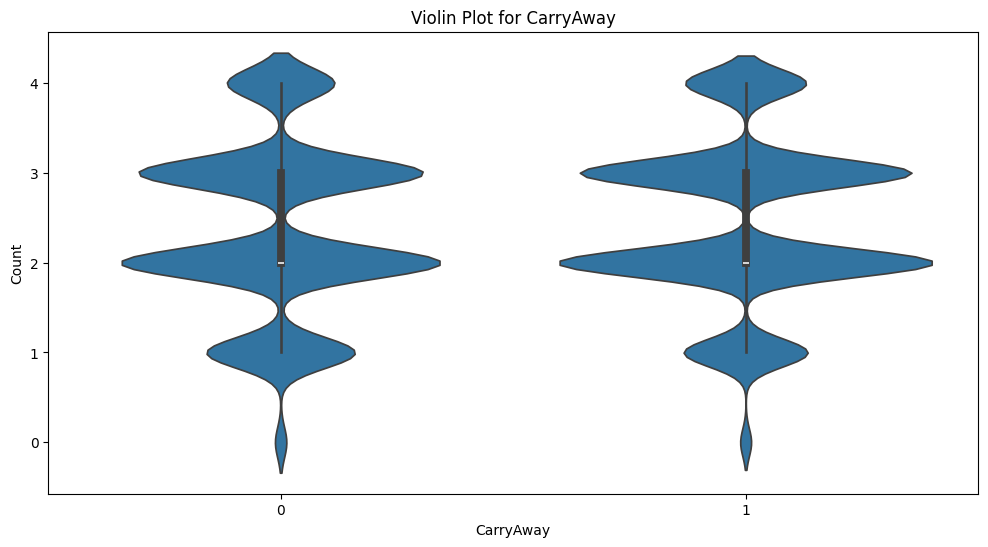

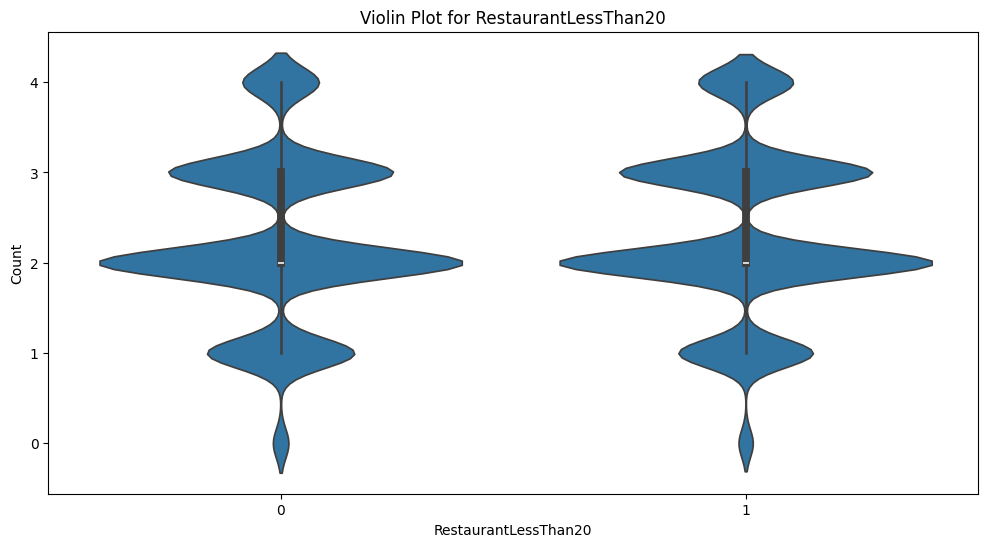

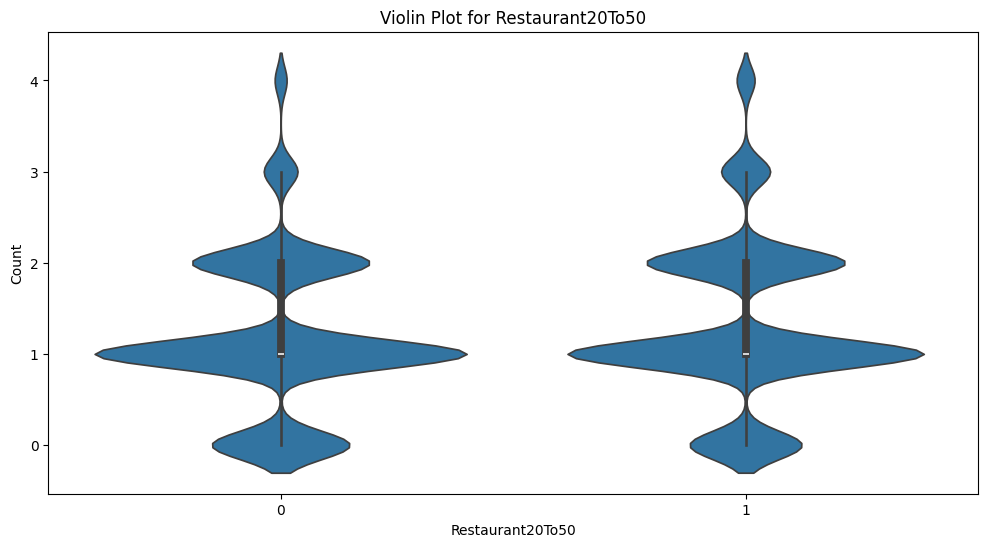

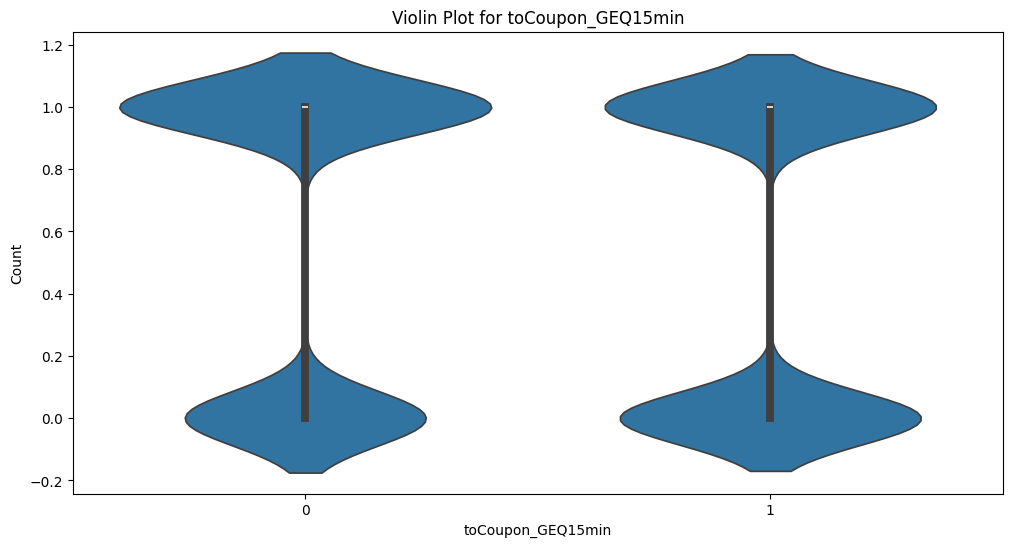

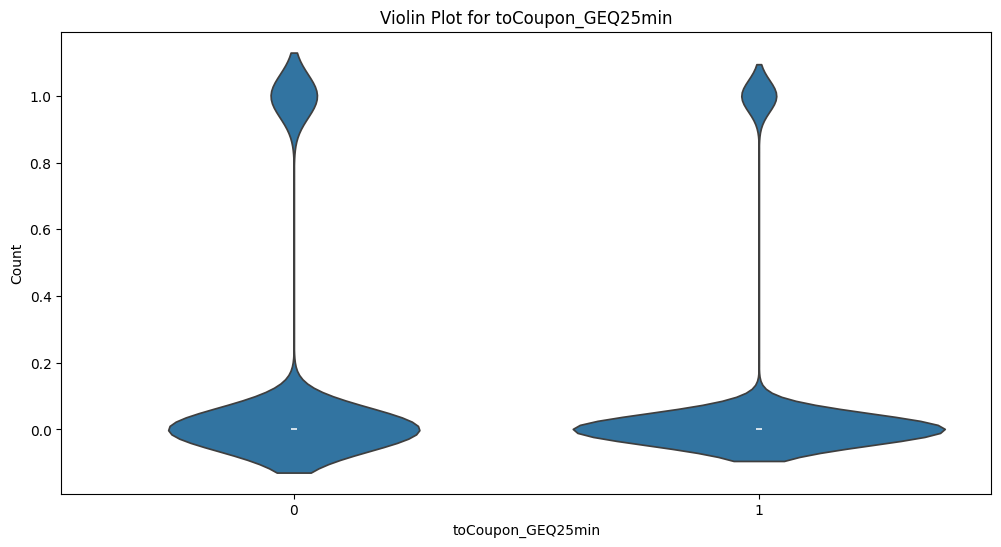

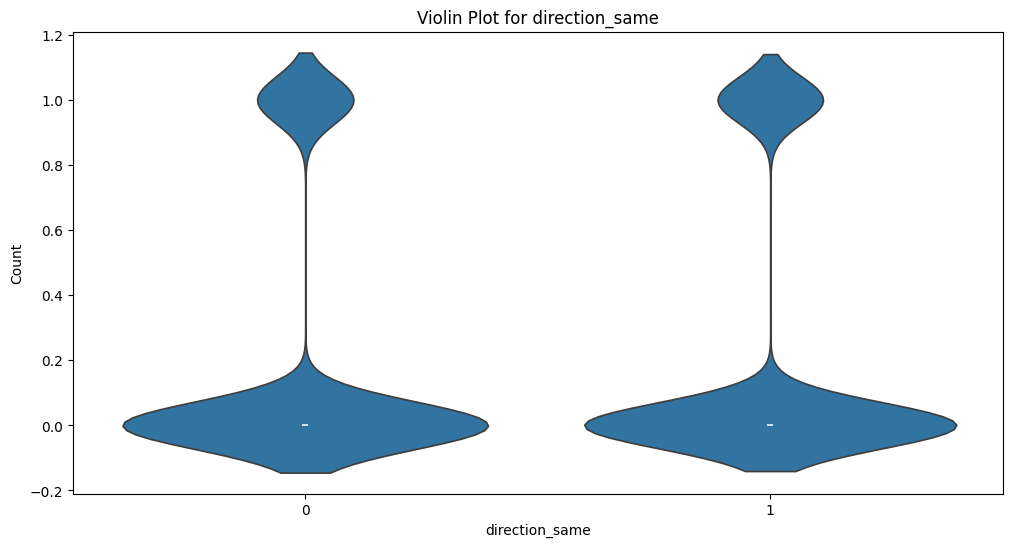

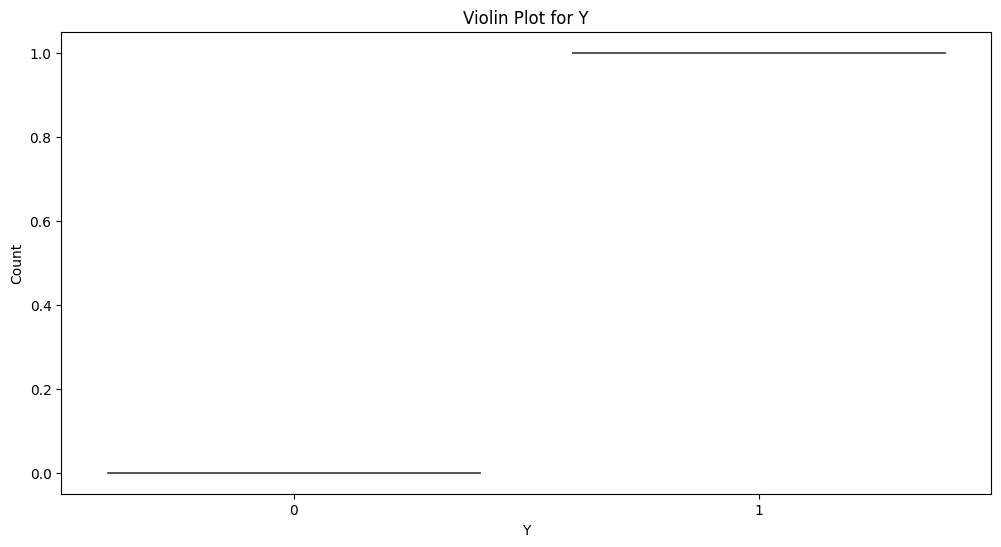

In [32]:
# ViolinPlot Analysis:
def violinplot(df):

  for i in df.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=data["Y"], y=data[i])
    plt.title(f"Violin Plot for {i}")
    plt.xlabel(f"{i}")
    plt.ylabel("Count")
    plt.show()

violinplot(data)

## Analysis

1. Individuals are more likely buy coupon on sunny and hot weather.
2. Frequent visitors to CoffeeHouse and Restaurants (Less than 20 & $20-50 range) show a higher likelihood of accepting coupons.
3. Younger individuals seem more likely to accept coupons, while older groups have a lower acceptance rate.
4. Higher-income individuals tend to reject coupons more often compared to lower-income groups.
5. Individual who are alone buys out more coupon.
6. Single and married couples buys out more Coupons.
7. Coupons with expiration of 1 day are sold more.
8. Family with no children buy more coupon.
9. Individuals with no degree or bachelor degree or who are unemployed buys more coupon i.e Higher the education less the chance to buy coupon.
10. The dataset is imbalanced and we will need to perform Smote to make it balanced.
